In [1]:
from transformers import pipeline

checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification")
#checkpoint = "google/siglip-so400m-patch14-384"
#detector = pipeline(task="zero-shot-image-classification", model="google/siglip-so400m-patch14-384")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use mps:0


In [2]:
from datasets import load_dataset

dataset = load_dataset('dpdl-benchmark/oxford_flowers102')
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1020
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 6149
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 1020
    })
})

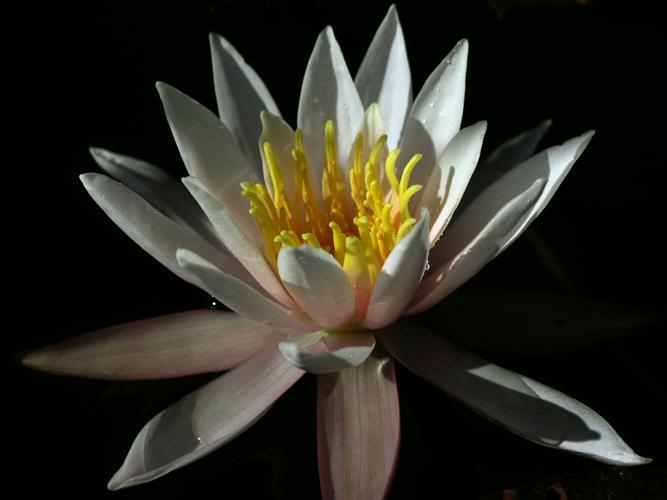

In [3]:
dataset['train'][0]['image']

In [4]:
# (WICHTIG) Subset aus dem Dataset wählen
sample_dataset = dataset['train'].select(range(100))

In [6]:
from PIL import Image
import io
from tqdm import tqdm

labels_flowers102 = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea", 
    "english marigold", "tiger lily", "moon orchid", "bird of paradise", "monkshood",
    "globe thistle", "snapdragon", "colt's foot", "king protea", "spear thistle", 
    "yellow iris", "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary", 
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers", 
    "stemless gentian", "artichoke", "sweet william", "carnation", "garden phlox",
    "love in the mist", "mexican aster", "alpine sea holly", "ruby-lipped cattleya",
    "cape flower", "great masterwort", "siam tulip", "lenten rose", "barbeton daisy",
    "daffodil", "sword lily", "poinsettia", "bolero deep blue", "wallflower", 
    "marigold", "buttercup", "oxeye daisy", "common dandelion", "petunia", "wild pansy",
    "primula", "sunflower", "pelargonium", "bishop of llandaff", "gaura", "geranium",
    "orange dahlia", "pink-yellow dahlia?", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum", "spring crocus",
    "bearded iris", "windflower", "tree poppy", "gazania", "azalea", "water lily", 
    "rose", "thorn apple", "morning glory", "passion flower", "lotus", "toad lily", 
    "anthurium", "frangipani", "clematis", "hibiscus", "columbine", "desert-rose", 
    "tree mallow", "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum", 
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow", 
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper", "blackberry lily", 
    "common tulip", "wild rose"
]


# List to store true labels and predicted labels
true_labels = []
predicted_labels = []

In [7]:

for i in tqdm(range(len(dataset['train']))):
    # Get the PIL image directly from the dataset
    image = dataset['train'][i]['image']
    
    # Run the detector on the image with the provided labels
    results = detector(image, candidate_labels=labels_flowers102)
    # Sort the results by score in descending order
    sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)
    
    # Get the top predicted label
    predicted_label = sorted_results[0]['label']
    
    # Append the true and predicted labels to the respective lists
    true_labels.append(dataset['train'][i]['label'])
    predicted_labels.append(predicted_label)


100%|██████████| 1020/1020 [05:34<00:00,  3.05it/s]


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Convert true_labels (indices) to class names
true_labels_str = [labels_flowers102[idx] for idx in true_labels]

# Calculate accuracy
accuracy = accuracy_score(true_labels_str, predicted_labels)

# Calculate precision and recall
precision = precision_score(true_labels_str, predicted_labels, average='weighted', labels=labels_flowers102)
recall = recall_score(true_labels_str, predicted_labels, average='weighted', labels=labels_flowers102)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7471
Precision: 0.7136
Recall: 0.7471


/Users/nadjalautenschlager/Desktop/ai-flower-classifier/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nadjalautenschlager/Desktop/ai-flower-classifier/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Gradio example

In [9]:
import gradio as gr
from transformers import pipeline

# Load models
vit_classifier = pipeline("image-classification", model="lautenad/vit-base-flowers102")
clip_detector = pipeline(model="openai/clip-vit-large-patch14", task="zero-shot-image-classification")

labels_flowers102 = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea", 
    "english marigold", "tiger lily", "moon orchid", "bird of paradise", "monkshood",
    "globe thistle", "snapdragon", "colt's foot", "king protea", "spear thistle", 
    "yellow iris", "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary", 
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers", 
    "stemless gentian", "artichoke", "sweet william", "carnation", "garden phlox",
    "love in the mist", "mexican aster", "alpine sea holly", "ruby-lipped cattleya",
    "cape flower", "great masterwort", "siam tulip", "lenten rose", "barbeton daisy",
    "daffodil", "sword lily", "poinsettia", "bolero deep blue", "wallflower", 
    "marigold", "buttercup", "oxeye daisy", "common dandelion", "petunia", "wild pansy",
    "primula", "sunflower", "pelargonium", "bishop of llandaff", "gaura", "geranium",
    "orange dahlia", "pink-yellow dahlia?", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum", "spring crocus",
    "bearded iris", "windflower", "tree poppy", "gazania", "azalea", "water lily", 
    "rose", "thorn apple", "morning glory", "passion flower", "lotus", "toad lily", 
    "anthurium", "frangipani", "clematis", "hibiscus", "columbine", "desert-rose", 
    "tree mallow", "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum", 
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow", 
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper", "blackberry lily", 
    "common tulip", "wild rose"
]


def classify_flower(image):
    vit_results = vit_classifier(image)
    vit_output = {}

    for r in vit_results:
        try:
            idx = int(r["label"].replace("LABEL_", "")) if isinstance(r["label"], str) else int(r["label"])
            label = labels_flowers102[idx]
        except:
            label = str(r["label"])
        vit_output[str(label)] = float(r["score"])

    clip_results = clip_detector(image, candidate_labels=labels_flowers102)
    clip_output = {str(r["label"]): float(r["score"]) for r in clip_results}

    return {
        "ViT Classification": vit_output,
        "CLIP Zero-Shot Classification": clip_output
    }



example_images = [
    ["gradio-flower-app/example-images/camellia.jpg"],
    ["gradio-flower-app/example-images/mallow.jpg"],
    ["gradio-flower-app/example-images/rose.jpg"],
    ["gradio-flower-app/example-images/Tiger-lily.jpg"],
    ["gradio-flower-app/example-images/wallflower.jpg"]
]

iface = gr.Interface(
    fn=classify_flower,
    inputs=gr.Image(type="pil"),
    outputs=gr.JSON(),
    title="Flower Classification Comparison",
    description="Upload an image of a flower, and compare results from a trained ViT model and a zero-shot CLIP model.",
    examples=example_images
)

iface.launch()

model.safetensors:   0%|          | 0.00/344M [00:00<?, ?B/s]

Device set to use mps:0
Device set to use mps:0


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
